In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from here.

In this dataset our desired target for classification task will be converted variable - has the client signed up to the platform or not.

## Data preparation
Check if the missing values are presented in the features.
If there are missing values:
For caterogiral features, replace them with 'NA'
For numerical features, replace with with 0.0
Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1



In [2]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

In [3]:
df = pd.read_csv('course_lead_scoring.csv')

In [4]:
df.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

In [5]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [6]:
#categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [7]:
df.interaction_count.unique()

array([ 4,  1,  3,  6,  2,  0,  5,  7,  9,  8, 10, 11])

In [8]:
df.annual_income.isnull().sum()

np.int64(181)

In [9]:
df.annual_income = df.annual_income.fillna(0.0)

In [10]:
df.columns[df.isnull().any()]

Index(['lead_source', 'industry', 'employment_status', 'location'], dtype='object')

In [11]:
df.lead_source.isnull().sum()

np.int64(128)

In [12]:
df.lead_source = df.lead_source.fillna("NA")

In [13]:
df.industry.isnull().sum()

np.int64(134)

In [14]:
df.industry = df.industry.fillna("NA")

In [15]:
df.employment_status.isnull().sum()

np.int64(100)

In [16]:
df.employment_status = df.employment_status.fillna("NA")

In [17]:
df.location.isnull().sum()

np.int64(63)

In [18]:
df.location = df.location.fillna("NA")

In [19]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [20]:
df.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

In [21]:
df.number_of_courses_viewed.isnull().sum()

np.int64(0)

In [22]:
df.annual_income.isnull().sum()

np.int64(0)

In [23]:
df.interaction_count.isna().sum()

np.int64(0)

In [24]:
df.lead_score.isna().sum()

np.int64(0)

````
Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1
`

In [25]:
df[df.converted == 0].count()/df.count()

lead_source                 0.380985
industry                    0.380985
number_of_courses_viewed    0.380985
annual_income               0.380985
employment_status           0.380985
location                    0.380985
interaction_count           0.380985
lead_score                  0.380985
converted                   0.380985
dtype: float64

In [26]:
categorical = ['lead_source', 'industry', 'employment_status', 'location']
numerical = ['number_of_courses_viewed', 'interaction_count', 'annual_income', 'lead_score']

In [27]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [28]:
#Split data into train/val/test split of 60/20/20 using sklearn.

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

# Question 1: ROC AUC feature importance
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.
Use the training dataset for that
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['balance'])

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

## Which numerical variable (among the following 4) has the highest AUC?

- lead_score
- number_of_courses_viewed
- interaction_count
- annual_income



In [29]:
for c in numerical:
    score = roc_auc_score(y_train, df_train[c])
    if score < 0.5:
        score = roc_auc_score( y_train, -df_train[c])
    print(c, score)
    

number_of_courses_viewed 0.7635680590007088
interaction_count 0.738270176293409
annual_income 0.5519578313253012
lead_score 0.6144993577250176


# Question 2: Training the model

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

## What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.32
- 0.52
- 0.72
- 0.92


In [42]:
def generate_metrics_for_binary_classification(y_val, y_pred, t=0.5):
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    #Confusion Matrix - True Positive && True Negative
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    #Confusion Matrix = False Positive & False Negative
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    #Precision and Recall
    SMALL_VALUE = 0.00000001
    if tp == 0 and fp == 0: 
        tp = SMALL_VALUE
        
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    #True Positive Rate and False Positive Rate
    tpr = tp / (tp + fn) 
    fpr = fp / (fp + tn)

    #f1_score = 2 * (Precision*Recall) / (Precision + Recall)
    f1 = 2* (precision*recall) / (precision + recall)

    return tp, tn, fp, fn, precision, recall, tpr, fpr, f1

In [67]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=10000)
model.fit(X_train, y_train)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)[:, 1]

coversions = (y_pred >= 0.5)
#print(round((y_val == coversions).mean(), 3))


score = roc_auc_score(y_val, y_pred)
score = round(score, 2)
print(score)

fpr, tpr, thresholds = roc_curve(y_val, y_pred)
print(round(auc(fpr, tpr), 2))


0.82
0.82


# Question 3: Precision and Recall
Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
For each threshold, compute precision and recall
Plot them

## At which threshold precision and recall curves intersect?

- 0.145
- 0.345
- 0.545
- 0.745

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score


In [69]:
#Attempt Problem 2 and 3 with lbfgs as values were not working. Using results from liblinear and 10000 iterations
X_train_num = df_train[numerical].values
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train_num)

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_cat = ohe.fit_transform(df_train[categorical].values)

X_train2 = np.column_stack([X_train_num, X_train_cat])
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=1)
model.fit(X_train2, y_train)

X_val_num = df_val[numerical].values
X_val_num = scaler.transform(X_val_num)
X_val_cat = ohe.transform(df_val[categorical].values)
X_val2 = np.column_stack([X_val_num, X_val_cat])

y_pred2 = model.predict_proba(X_val2)[:, 1]
accuracy_score(y_val, y_pred2 >= 0.5)

score = roc_auc_score(y_val, y_pred2)
score = round(score, 2)
print(score)


0.92


0.64
0.65


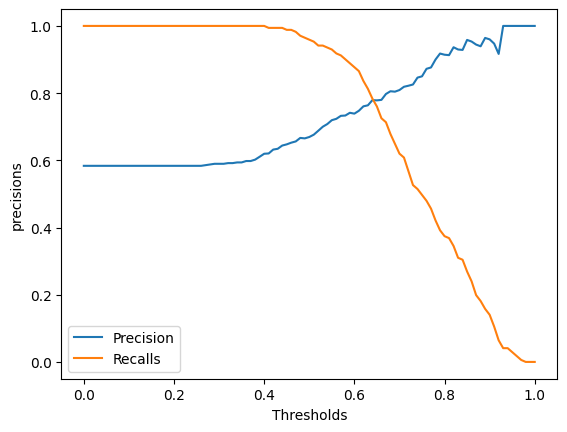

In [70]:
precisions = []
recalls = []
thresholds = np.linspace(0, 1, 101)
for t in thresholds:
    tp, tn, fp, fn, precision, recall, tpr, fpr, f1 = generate_metrics_for_binary_classification(y_val, y_pred, t=t)
    precisions.append(precision)
    recalls.append(recall)
    if abs(recall-precision) < 0.02:
        print(t)


plt.plot(thresholds, precisions, label='Precision')
plt.xlabel("Thresholds")
plt.ylabel("precisions")
plt.plot(thresholds, recalls, label='Recalls')
plt.legend()

    


# Question 4: F1 score
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

F1= 2⋅P⋅R/(P+R)

Where 
P is precision and 
R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

## At which threshold F1 is maximal?

- 0.14
- 0.34
- 0.54
- 0.74

In [71]:
def get_threshold_at_max_f1_score(tmin, tmax, y_val_in, y_pred_in):
    f1_scores = []
    thresholds = np.linspace(tmin, tmax, 101)
    for t in thresholds:
        tp, tn, fp, fn, precision, recall, tpr, fpr, f1 = generate_metrics_for_binary_classification(y_val_in, y_pred_in, t=t)
        f1_scores.append(f1)
    
    plt.plot(thresholds, f1_scores, label='F1')
    plt.xlabel("Thresholds")
    plt.ylabel("F1 Score")
    plt.legend()

    idx = f1_scores.index(max(f1_scores))
    print(idx, round(max(f1_scores), 3), thresholds[idx])
    

57 0.812 0.5700000000000001


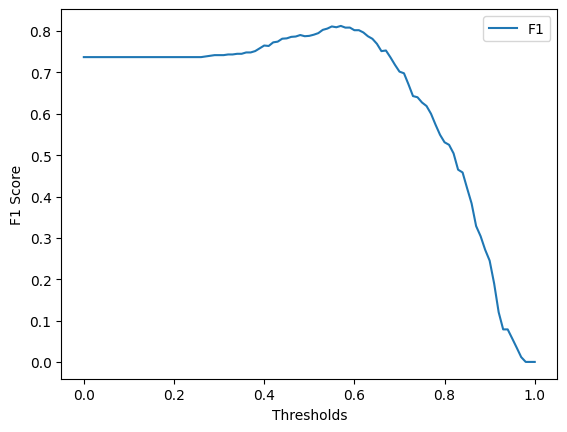

In [72]:
get_threshold_at_max_f1_score(0.0, 1.0, y_val, y_pred)

53 0.88 0.53


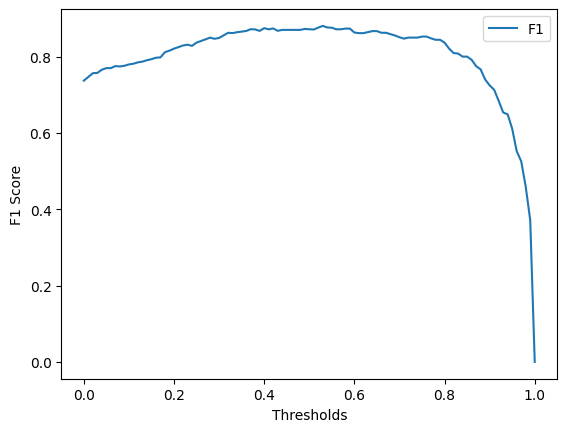

In [73]:
get_threshold_at_max_f1_score(0.0, 1.0, y_val, y_pred2)

m
# Question 5: 5-Fold CV

## Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

``` KFold(n_splits=5, shuffle=True, random_state=1) ```

Iterate over different folds of df_full_train
Split the data into train and validation
Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
Use AUC to evaluate the model on validation

### How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.36

In [74]:
from sklearn.model_selection import KFold


In [103]:
#copy from classwork

def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [104]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [105]:
#for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
n_splits = 5
for C in [1]:
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    scores = []
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))
    print('std deviation: +/- %.3f' %(np.std(scores)))

    
#Note: closest answer 0.06 so choosing that...tried lbgfs and increasing iterations and playing with C, the other option with 0 C is 
# 0.006...

C=1 0.822 +- 0.036
std deviation: +/- 0.036


## Question 6: Hyperparameter Tuning
Now let's use 5-Fold cross-validation to find the best parameter C

Iterate over the following C values: [0.000001, 0.001, 1]
Initialize KFold with the same parameters as previously
Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

### Which C leads to the best mean score?

- 0.000001
- 0.001
- 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C.

  

In [111]:
for C in [0.000001, 0.001, 1]:
    n_splits=5
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    scores = []
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s \t %.3f \t+- %.3f' % (C, round(np.mean(scores), 3), round(np.std(scores), 3)))
    #print('std deviation: +/- %.3f' %(np.std(scores)))


C=1e-06 	 0.560 	+- 0.024
C=0.001 	 0.867 	+- 0.029
C=1 	 0.822 	+- 0.036


In [112]:
#Answer for 6 is C=0.001